<a href="https://colab.research.google.com/github/KodingForKittehs/AdventOfCode-2023/blob/main/Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [--- Day 2: Cube Conundrum ---](https://adventofcode.com/2023/day/2)

Use `input` file if present, otherwise sample input.

In [ ]:
from pprint import pprint
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import requests

verbose = False

try:
  input = [r.strip() for r in open("input", "r").readlines()]
except FileNotFoundError:
  input = """Game 1: 3 blue, 4 red; 1 red, 2 green, 6 blue; 2 green
Game 2: 1 blue, 2 green; 3 green, 4 blue, 1 red; 1 green, 1 blue
Game 3: 8 green, 6 blue, 20 red; 5 blue, 4 red, 13 green; 5 green, 1 red
Game 4: 1 green, 3 red, 6 blue; 3 green, 6 red; 3 green, 15 blue, 14 red
Game 5: 6 red, 1 blue, 3 green; 2 blue, 1 red, 2 green"""
  input = input.split("\n")
  verbose = True
pprint(input)



['Game 1: 3 blue, 4 red; 1 red, 2 green, 6 blue; 2 green',
 'Game 2: 1 blue, 2 green; 3 green, 4 blue, 1 red; 1 green, 1 blue',
 'Game 3: 8 green, 6 blue, 20 red; 5 blue, 4 red, 13 green; 5 green, 1 red',
 'Game 4: 1 green, 3 red, 6 blue; 3 green, 6 red; 3 green, 15 blue, 14 red',
 'Game 5: 6 red, 1 blue, 3 green; 2 blue, 1 red, 2 green']


## Part 1

In [ ]:
# Part 1
mapping = {
    "red": 12,
    "green": 13,
    "blue": 14
}

xdata = []  # Game number
ydata = []  # Number of rolls for one game

def game_value(line):
  print(line)
  sp1 = line.split(': ')
  game = int(sp1[0].split()[1])
  score = game
  ys = [0, 0, 0]
  for roll in sp1[1].split("; "):
    colors = roll.split(", ")
    for color in colors:
      cnt_color = color.split()
      cnt_color[0] = int(cnt_color[0])
      match cnt_color:
        case _, "red":
          ys[0] += cnt_color[0]
        case _, "green":
          ys[1] += cnt_color[0]
        case _, "blue":
          ys[2] += cnt_color[0]
      if cnt_color[0] > mapping[cnt_color[1]]:
        print(f"game {game} not possible: {cnt_color[1]} had a value of {cnt_color[0]}")
        score = 0
  xdata.append(game)
  ydata.append(ys)
  return score

total = 0
for line in input:
  if res:= game_value(line):
    total += res

#assert(total == 8)
if verbose:
  print(xdata, ydata)


Game 1: 3 blue, 4 red; 1 red, 2 green, 6 blue; 2 green
Game 2: 1 blue, 2 green; 3 green, 4 blue, 1 red; 1 green, 1 blue
Game 3: 8 green, 6 blue, 20 red; 5 blue, 4 red, 13 green; 5 green, 1 red
game 3 not possible: red had a value of 20
Game 4: 1 green, 3 red, 6 blue; 3 green, 6 red; 3 green, 15 blue, 14 red
game 4 not possible: blue had a value of 15
game 4 not possible: red had a value of 14
Game 5: 6 red, 1 blue, 3 green; 2 blue, 1 red, 2 green
[1, 2, 3, 4, 5] [[5, 4, 9], [1, 6, 6], [25, 26, 11], [23, 7, 21], [7, 5, 3]]


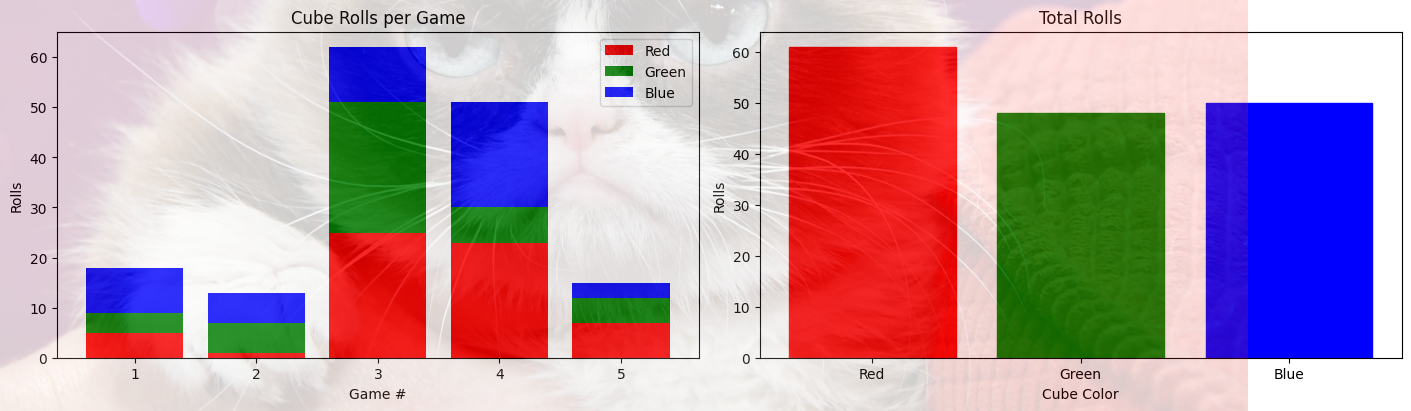

In [ ]:
def plot():
  x = xdata
  ys = np.array(ydata)
  red = ys[:, 0]
  green = ys[:, 1]
  blue = ys[:, 2]

  yy = {
      "Red": red,
      "Green": green,
      "Blue": blue,
  }

  fig, ax = plt.subplots(1, 2, figsize=(14, 4), layout="constrained")

  bottom = np.zeros(len(x))
  for color, counts in yy.items():
    p = ax[0].bar(x, counts, label=color, bottom=bottom, color=color)
    bottom += counts

  ax[0].set_title("Cube Rolls per Game")
  ax[0].legend(loc="upper right")
  ax[0].set_xlabel("Game #")
  ax[0].set_ylabel("Rolls")

  bars = ax[1].bar(["Red", "Green", "Blue"], [np.sum(red), np.sum(green), np.sum(blue)])
  ax[1].set_title("Total Rolls")
  ax[1].set_ylabel("Rolls")
  ax[1].set_xlabel("Cube Color")
  bars[0].set_color('red')
  bars[1].set_color('green')
  bars[2].set_color('blue')

  # Make it Grumpy
  url = 'https://helios-i.mashable.com/imagery/articles/05QaBU6iZ3QeMe3T0hUDwUX/hero-image.fill.size_1248x702.v1623385028.png'
  img = Image.open(requests.get(url, stream=True).raw)
  fig.figimage(img, alpha=0.2)
  plt.show()

plot()

## Part 2


In [ ]:
# Part 2
# Want to find the max of each color in a game

def get_power(game):
  print(game)
  maxrgb = {
      "red": 0,
      "blue": 0,
      "green": 0
  }
  sp1 = line.split(': ')
  rolls = sp1[1].split("; ")
  for roll in rolls:
    colors = roll.split(", ")
    for color in colors:
      cnt_color = color.split()
      maxrgb[cnt_color[1]] = max(maxrgb[cnt_color[1]], int(cnt_color[0]))
  power = maxrgb["red"] * maxrgb["green"] * maxrgb["blue"]
  print("maxrgb", maxrgb, "power", power)
  return power

total_power = 0
for line in input:
  total_power += get_power(line)
print("total power", total_power)

#assert(total_power == 2286)

Game 1: 3 blue, 4 red; 1 red, 2 green, 6 blue; 2 green
maxrgb {'red': 4, 'blue': 6, 'green': 2} power 48
Game 2: 1 blue, 2 green; 3 green, 4 blue, 1 red; 1 green, 1 blue
maxrgb {'red': 1, 'blue': 4, 'green': 3} power 12
Game 3: 8 green, 6 blue, 20 red; 5 blue, 4 red, 13 green; 5 green, 1 red
maxrgb {'red': 20, 'blue': 6, 'green': 13} power 1560
Game 4: 1 green, 3 red, 6 blue; 3 green, 6 red; 3 green, 15 blue, 14 red
maxrgb {'red': 14, 'blue': 15, 'green': 3} power 630
Game 5: 6 red, 1 blue, 3 green; 2 blue, 1 red, 2 green
maxrgb {'red': 6, 'blue': 2, 'green': 3} power 36
total power 2286


Things Learned
- I spent a bit of time trying to figure out why my `total` was not accumulating..when using = instead of +=